In [15]:
import pandas as pd
data_classification = pd.read_csv('datasets/train_data.csv')
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [16]:
from pycaret import classification
classification_setup = classification.setup(data=data_classification, target = 'Personal Loan')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7935
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(4000, 14)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [17]:
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9893,0.9444,0.8889,1.0000,0.9412,0.9353
1,0.9857,0.9756,0.9630,0.8966,0.9286,0.9206
2,0.9750,0.9035,0.8148,0.9167,0.8627,0.8490
3,0.9929,0.9795,0.9630,0.9630,0.9630,0.9590
4,0.9786,0.9551,0.9259,0.8621,0.8929,0.8810
5,0.9857,0.9590,0.9259,0.9259,0.9259,0.9180
6,0.9857,0.9590,0.9259,0.9259,0.9259,0.9180
7,0.9786,0.9220,0.8519,0.9200,0.8846,0.8728
8,0.9643,0.8975,0.8148,0.8148,0.8148,0.7951
9,0.9857,0.9576,0.9231,0.9231,0.9231,0.9152


In [18]:
classficiation_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9893,0.9991,0.9630,0.9286,0.9455,0.9395
1,0.9964,0.9952,0.9630,1.0000,0.9811,0.9792
2,0.9750,0.9928,0.8148,0.9167,0.8627,0.8490
3,0.9857,0.9993,0.9259,0.9259,0.9259,0.9180
4,0.9821,0.9955,0.8889,0.9231,0.9057,0.8958
5,0.9929,0.9993,0.9259,1.0000,0.9615,0.9576
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9821,0.9965,0.8519,0.9583,0.9020,0.8922
8,0.9821,0.9889,0.8519,0.9583,0.9020,0.8922
9,0.9892,0.9991,0.9231,0.9600,0.9412,0.9353


In [19]:
tune_catboost = classification.tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9893,0.9974,0.9630,0.9286,0.9455,0.9395
1,0.9893,0.9975,0.9259,0.9615,0.9434,0.9375
2,0.9786,0.9971,0.7778,1.0000,0.8750,0.8635
3,0.9893,0.9974,0.9259,0.9615,0.9434,0.9375
4,0.9786,0.9933,0.8519,0.9200,0.8846,0.8728
5,0.9929,0.9953,0.9259,1.0000,0.9615,0.9576
6,0.9964,1.0000,0.9630,1.0000,0.9811,0.9792
7,0.9821,0.9956,0.8519,0.9583,0.9020,0.8922
8,0.9821,0.9955,0.8519,0.9583,0.9020,0.8922
9,0.9892,0.9985,0.9231,0.9600,0.9412,0.9353


In [20]:
blender = classification.blend_models(estimator_list=[classification_dt, classficiation_xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9893,0.0,0.8889,1.0000,0.9412,0.9353
1,0.9964,0.0,0.9630,1.0000,0.9811,0.9792
2,0.9786,0.0,0.8148,0.9565,0.8800,0.8683
3,0.9893,0.0,0.9259,0.9615,0.9434,0.9375
4,0.9857,0.0,0.8889,0.9600,0.9231,0.9152
5,0.9929,0.0,0.9259,1.0000,0.9615,0.9576
6,0.9929,0.0,0.9259,1.0000,0.9615,0.9576
7,0.9821,0.0,0.8148,1.0000,0.8980,0.8883
8,0.9786,0.0,0.8148,0.9565,0.8800,0.8683
9,0.9892,0.0,0.9231,0.9600,0.9412,0.9353


In [21]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.987500,0.997300,0.907100,0.961700,0.932800,0.925900
1,Extreme Gradient Boosting,0.987500,0.996600,0.910800,0.957100,0.932800,0.925900
2,Light Gradient Boosting Machine,0.986400,0.996700,0.881100,0.975700,0.925100,0.917700
3,CatBoost Classifier,0.986400,0.997700,0.888500,0.968400,0.926000,0.918600
4,Decision Tree Classifier,0.982100,0.945300,0.899700,0.914800,0.906300,0.896400
5,Extra Trees Classifier,0.980700,0.992200,0.806800,0.991300,0.888400,0.878000
6,Random Forest Classifier,0.980000,0.985800,0.803100,0.986800,0.883100,0.872400
7,Ada Boost Classifier,0.968600,0.978900,0.788700,0.875800,0.827200,0.810100
8,Linear Discriminant Analysis,0.946400,0.964000,0.627800,0.771700,0.688200,0.659600
9,Ridge Classifier,0.939300,0.000000,0.386600,0.957700,0.544200,0.518700


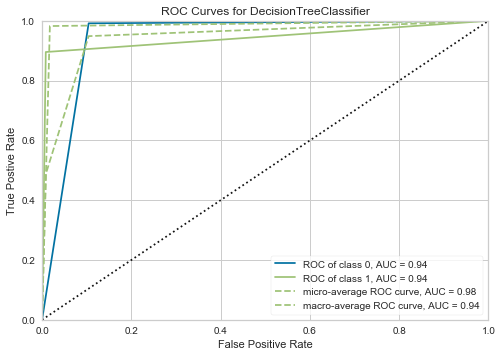

In [26]:
classification.plot_model(classification_dt, plot='auc')


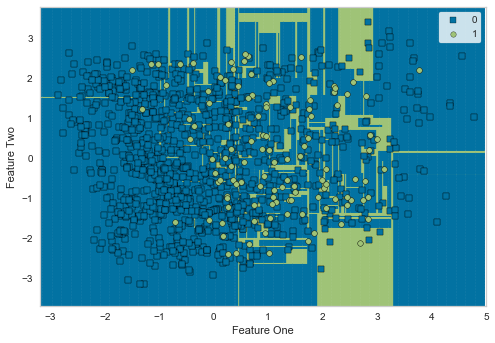

In [27]:
classification.plot_model(classification_dt, plot='boundary')

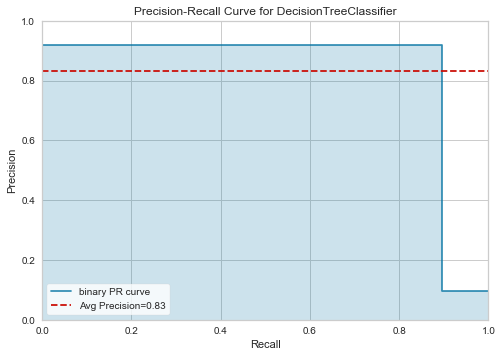

In [29]:
classification.plot_model(classification_dt, plot = 'pr')

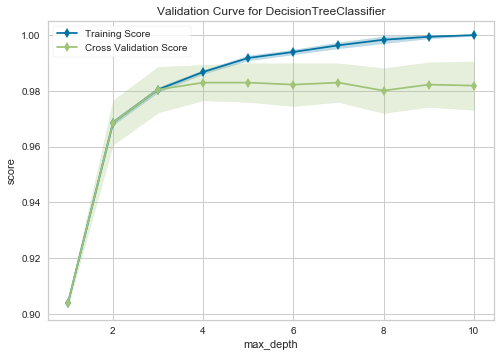

In [30]:
classification.plot_model(classification_dt, plot = 'vc')

In [31]:
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

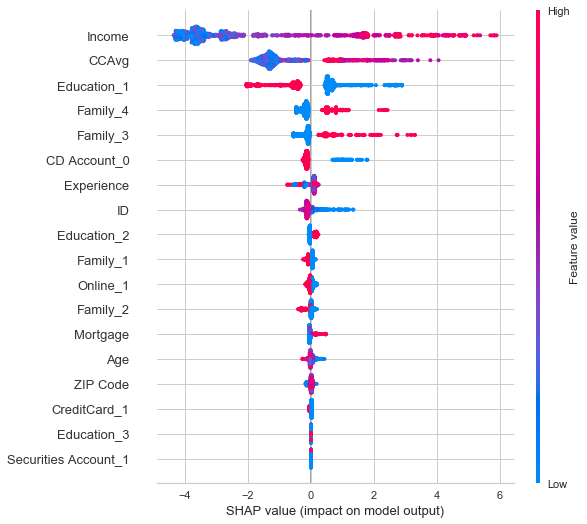

In [32]:
classification.interpret_model(classficiation_xgb)

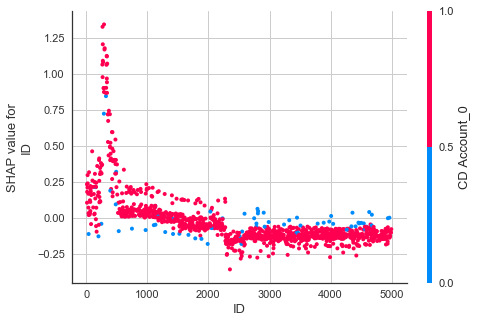

In [33]:
classification.interpret_model(classficiation_xgb, plot='correlation')

In [34]:
test_data_classification = pd.read_csv('datasets/test_data.csv')
predictions = classification.predict_model(classification_dt, data=test_data_classification)
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0,0,0.0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0,0,0.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0,0,0.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1,0,0.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,0.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0,0,0.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0,0,0.0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0,0,0.0


In [42]:
errors = 0
for index, row in predictions.iterrows():
    if row['Personal Loan'] != row['Score']:
        errors = errors + 1
accuracy = errors / predictions.shape[0] * 100
print(errors, accuracy)

19 1.9


In [45]:
classification.save_model(classification_dt, 'decision_tree_1')

Transformation Pipeline and Model Succesfully Saved


In [50]:
import numpy as np

model = classification.load_model(model_name='decision_tree_1')
columns = ["ID", "Age", "Experience", "Income", "ZIP Code", "Family", "CCAvg", "Education", "Mortgage", "Securities Account", "CD Account", "Online", "CreditCard"]
form_data = ['-1', '25', '5', '100000', '59000', '1', '0.0', '3', '0', '0', '0', '1', '1']
form_data = np.array(form_data)
data = pd.DataFrame([form_data], columns=columns)
prediction = classification.predict_model(model, data=data)
print(bool(prediction.Label[0]))

True
